### Import Libraries

In [1]:
from scipy.stats import kstest
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Dataset

In [2]:
df = pd.read_excel("COVID-19-geographic-disbtribution-worldwide-2020-03-26.xlsx")
df.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
0,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
1,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0
3,2020-03-23,23,3,2020,10,0,Afghanistan,AF,AFG,37172386.0
4,2020-03-22,22,3,2020,0,0,Afghanistan,AF,AFG,37172386.0


### Data for covid cases in china

In [3]:
df_c = df[df["Countries and territories"] == "China"]
df_c.head()

,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Country Code,Pop_Data.2018
1329,2020-03-26,26,3,2020,121,6,China,CN,CHN,1.392730e+09
1330,2020-03-25,25,3,2020,99,4,China,CN,CHN,1.392730e+09
1331,2020-03-24,24,3,2020,99,7,China,CN,CHN,1.392730e+09
1332,2020-03-23,23,3,2020,150,9,China,CN,CHN,1.392730e+09
1333,2020-03-22,22,3,2020,83,6,China,CN,CHN,1.392730e+09


### Descriptive Statistics

In [8]:
cases = df_c["Cases"].describe().to_frame()
cases.loc["var"] = np.var(df_c["Cases"])
cases.round(2)

,Cases
count,87.00
mean,942.16
std,1910.01
min,0.00
25%,22.00
50%,136.00
75%,1603.00
max,15141.00
var,3606199.61


###  Kolmogorov-Smirnov test

In [5]:
ks, p = kstest(df_c["Cases"], "norm")
print("p_value =", p, "\n")
if p > 0.05:
    print("Correspond to Normal Distribution")
else:
    print("Covid Casesdoes not correspond to Normal Distribution")

p_value = 3.8721232830095723e-69 

Covid Casesdoes not correspond to Normal Distribution


### Histogram of Covid Cases Frequency in China

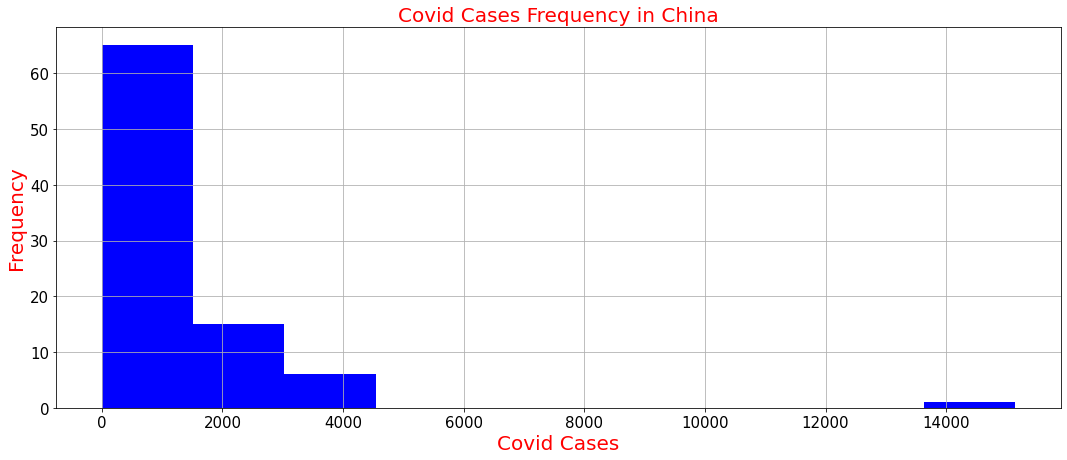

In [6]:
plt.figure(figsize = (18, 7))
df_c["Cases"].hist(color = "blue")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Covid Cases", color = "red", size = 20)
plt.ylabel("Frequency", color = "red", size = 20)
plt.title("Covid Cases Frequency in China", size = 20, color = "red")
plt.show()